Fit a CNN model to the sklearn.datasets.fetch_olivetti_faces() and compare with the PCA+SVC model trained in class. (Links to an external site.) HINT: The dataset is small, it might be beneficial to use data augmentation.

In [3]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


11501568/11490434 [==============================] - 1s 0us/step


In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

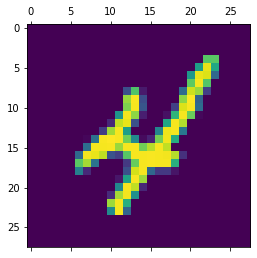

In [11]:
plt.matshow(X_train[9])

In [12]:
y_train[9]


4

In [13]:
X_train = X_train / 255
X_test = X_test / 255

In [14]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [16]:
X_train_flattened.shape

(60000, 784)

In [17]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 963us/step - loss: 0.4648 - accuracy: 0.8797
Epoch 2/5
1875/1875 [==============================] - 2s 866us/step - loss: 0.3033 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 2s 975us/step - loss: 0.2831 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2733 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2664 - accuracy: 0.9261


In [19]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 796us/step - loss: 0.2655 - accuracy: 0.9272


[0.26554223895072937, 0.9272000193595886]

In [20]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.2929758e-02, 2.8580885e-07, 4.4457644e-02, 9.5904911e-01,
       2.8883517e-03, 1.3228562e-01, 1.3335321e-06, 9.9980241e-01,
       1.0840666e-01, 6.6760021e-01], dtype=float32)

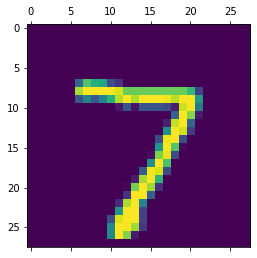

In [21]:
plt.matshow(X_test[0])

In [22]:
np.argmax(y_predicted[0])

7

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [24]:
y_predicted_labels[:5]


[7, 2, 1, 0, 4]

In [26]:
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1119,    2,    2,    0,    1,    4,    2,    5,    0],
       [   6,   11,  920,   17,    9,    4,   13,   10,   38,    4],
       [   4,    0,   18,  920,    1,   24,    3,   10,   19,   11],
       [   1,    1,    4,    1,  920,    0,   10,    4,    9,   32],
       [   9,    3,    2,   27,    7,  789,   16,    5,   27,    7],
       [   8,    3,    5,    1,    7,   14,  917,    2,    1,    0],
       [   1,    6,   22,    7,   10,    1,    0,  944,    3,   34],
       [   8,   13,    5,   23,    9,   31,    9,   11,  857,    8],
       [  11,    7,    1,   10,   28,    8,    0,   18,    3,  923]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

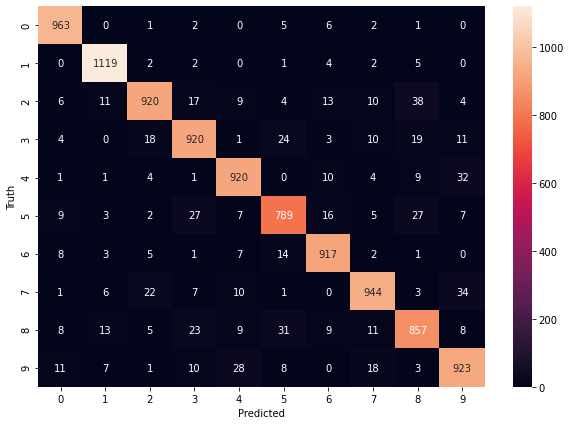

In [27]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [28]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2653 - accuracy: 0.9244
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1206 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0839 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0649 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0508 - accuracy: 0.9848


In [29]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 920us/step - loss: 0.0724 - accuracy: 0.9774


[0.0723581612110138, 0.977400004863739]

Text(69.0, 0.5, 'Truth')

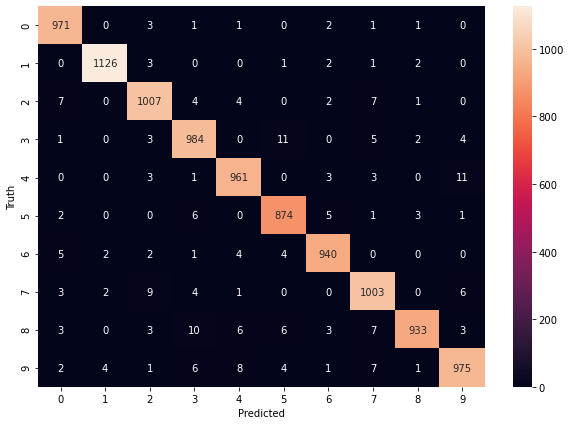

In [30]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2734 - accuracy: 0.9215
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1217 - accuracy: 0.9637
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0830 - accuracy: 0.9754
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0646 - accuracy: 0.9808
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0494 - accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0407 - accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0333 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0267 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0217 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.018

In [32]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 889us/step - loss: 0.0819 - accuracy: 0.9781


[0.08193551003932953, 0.9781000018119812]